In [1]:
%load_ext autoreload
%autoreload 2

import os
from os.path import join
from copy import deepcopy
from IPython.core.debugger import set_trace

import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import ipywidgets as widgets
import mne
import itertools 
from IPython.display import display, clear_output
import matplotlib as mpl
from matplotlib import pyplot as plt

import deepbci as dbci
import deepbci.utils.utils as utils

from deepbci.data_utils.data import Groups, run_group_mutators, compress_data
from deepbci.data_utils import scaling
%matplotlib notebook

In [2]:
# pip install mne --upgrade

In [3]:
mne.__version__

'0.22.0'

In [4]:
def load_data(groups, mutate=None):
    grps = Groups()
    grps.load_data(groups)
    
    if mutate is not None: 
        run_group_mutators(grps, mutate)
        
    return grps
config_local_path = join( 'visualize', 'configs', 'vis_raw.yaml')
config_path = utils.path_to(os.getcwd(), config_local_path)
config = utils.load_yaml(config_path)

groups = config.pop('groups')
mutate = config.pop('mutate', None)
mutate

In [5]:
grps = load_data(groups, mutate)

### Subject 5 200 dropped samples 

In [6]:
grps.data_map

group  dataset  subject  trial
dbci   BGSInt   5        5        <deepbci.data_utils.data.Data object at 0x7f66...
Name: data, dtype: object

In [7]:
data = grps['dbci', 'BGSInt', '5'][0].data

<IPython.core.display.Javascript object>


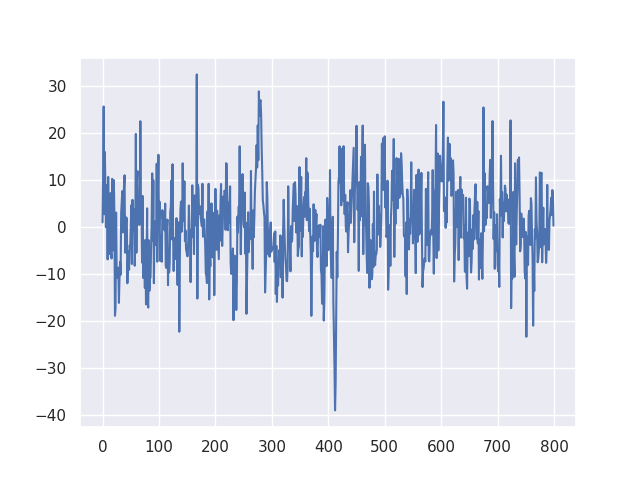

In [8]:
test = data.get_data()[0].reshape(-1,1)
plt.plot(test[0:800])

In [7]:
dataset = grps.data_map.loc[('dbci', 'OAObs', ['2'])][0]
channels = ['F3', 'F4', 'Fz', 'Cz']
df = dataset.data.to_data_frame()
df

,time,F3,F4,Fz,Cz,STI
0,-2000,-4.774207e+06,1.065993e+04,-3.466886e+06,-6.874737e+06,0.0
1,-1995,-2.273458e+07,-8.379972e+06,-1.730614e+07,-1.415517e+07,0.0
2,-1990,5.325056e+06,-4.590595e+06,-2.755387e+06,-5.015587e+06,0.0
3,-1985,1.230470e+07,1.404879e+07,7.355374e+06,4.094001e+06,0.0
4,-1980,8.014350e+06,2.358184e+06,1.015614e+07,-1.826403e+06,0.0
...,...,...,...,...,...,...
36007,178038,-6.200021e+06,-5.987309e+06,-5.460274e+06,-7.321625e+06,0.0
36008,178043,-1.740146e+06,5.021622e+05,-4.297041e+06,-4.477751e+06,0.0
36009,178048,-3.490319e+06,1.611512e+06,-3.853882e+06,-6.263928e+06,0.0
36010,178053,-1.178054e+07,-4.489259e+06,-6.230796e+06,-1.055015e+07,0.0


In [165]:
scaled_df = scaling.MAD(df.values)(df)
# scaled_df = scaling.STD(df.values)(df)
scaled_df

,time,F3,F4,Fz,Cz,STI
0,0.000000,-1.602785,0.003579,-1.163894,-2.307969,0.0
1,0.000002,-7.632394,-2.813303,-5.809973,-4.752136,0.0
2,0.000003,1.787714,-1.541143,-0.925032,-1.683820,0.0
3,0.000005,4.130902,4.716424,2.469327,1.374427,0.0
4,0.000007,2.690557,0.791683,3.409594,-0.613155,0.0
...,...,...,...,...,...,...
359800,0.603956,14.673145,-1.364150,-3.753026,2.715286,0.0
359801,0.603957,14.004178,-1.180904,-1.828737,4.450771,0.0
359802,0.603959,14.688368,-4.072820,-2.217534,2.641125,0.0
359803,0.603961,21.892407,-0.753954,-0.719592,5.054849,0.0


In [166]:
np.median(scaled_df[channels].values, axis=0)

array([-0.06347324, -0.03768954, -0.04130111, -0.01546382])

In [167]:
np.mean(scaled_df[channels].values, axis=0)

array([-0.0138138 ,  0.00665023, -0.00856177, -0.00090573])

In [168]:
df.shape

(359805, 6)

In [169]:
df.describe()

,time,F3,F4,Fz,Cz,STI
count,3.598050e+05,3.598050e+05,3.598050e+05,3.598050e+05,3.598050e+05,359805.000000
mean,8.995100e+05,-4.114709e+04,1.980902e+04,-2.550292e+04,-2.697887e+03,0.000339
std,5.193345e+05,1.368092e+07,9.915617e+06,1.035166e+07,9.599431e+06,0.018411
min,0.000000e+00,-1.321270e+08,-1.319262e+08,-1.226518e+08,-1.137570e+08,0.000000
25%,4.497550e+05,-7.749788e+06,-5.898985e+06,-6.441409e+06,-6.044532e+06,0.000000
50%,8.995100e+05,-1.890674e+05,-1.122657e+05,-1.230234e+05,-4.606202e+04,0.000000
75%,1.349265e+06,7.443893e+06,5.694322e+06,6.197277e+06,6.003226e+06,0.000000
max,1.799020e+06,1.131488e+08,1.206246e+08,9.027222e+07,1.011205e+08,1.000000


In [171]:
scaled_df.describe()

,time,F3,F4,Fz,Cz,STI
count,359805.000000,359805.000000,359805.000000,359805.000000,359805.000000,3.598050e+05
mean,0.301981,-0.013814,0.006650,-0.008562,-0.000906,1.138326e-10
std,0.174350,4.592922,3.328845,3.475233,3.222696,6.180835e-09
min,0.000000,-44.357335,-44.289923,-41.176351,-38.190200,0.000000e+00
25%,0.150991,-2.601739,-1.980392,-2.162493,-2.029255,0.000000e+00
50%,0.301981,-0.063473,-0.037690,-0.041301,-0.015464,0.000000e+00
75%,0.452972,2.499045,1.911683,2.080534,2.015388,0.000000e+00
max,0.603962,37.986019,40.495796,30.305959,33.947930,3.357174e-07


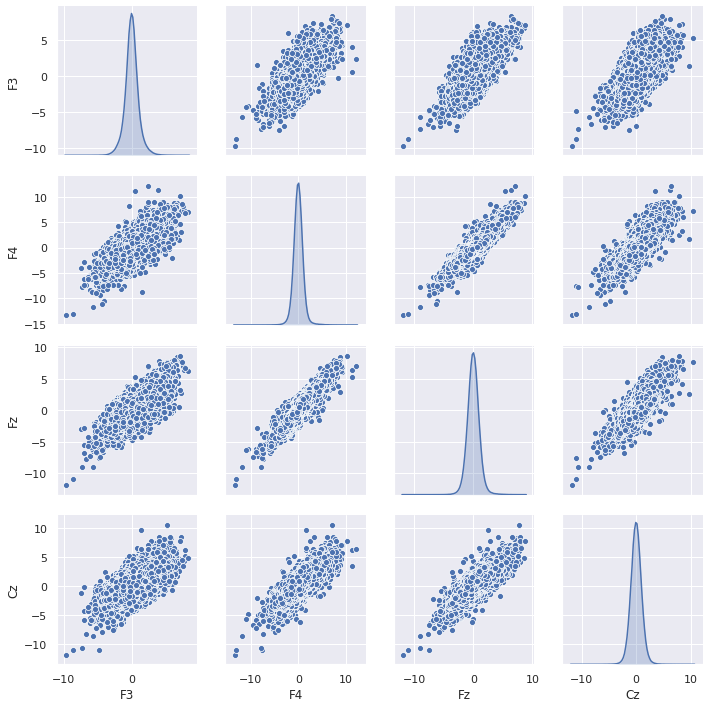

In [150]:
sns.pairplot(scaled_df[['F3', 'F4', 'Fz', 'Cz']], diag_kind='kde')

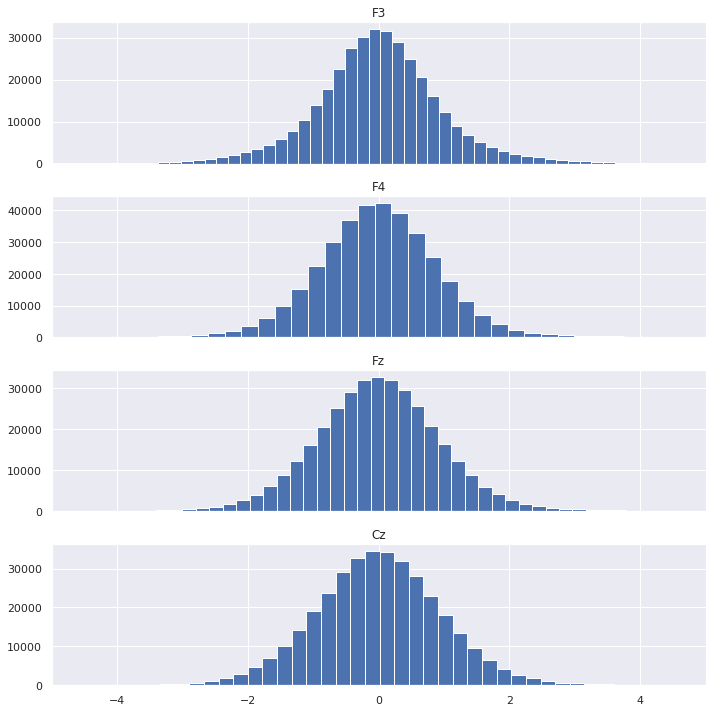

In [154]:
fig, ax = plt.subplots(len(channels), 1, figsize=(10,10), sharex=True)

for a, c in zip (ax, channels):
    a.hist(scaled_df[[c]].values, bins=100)
    a.title.set_text(c)
plt.tight_layout()
plt.xlim([-5, 5])
plt.show()

In [8]:
raw = grps.get_series(['dbci', ['OAOut'], [1], [1]]).ravel()[0]
raw.data.to_data_frame(scalings=dict(eeg=1))

,time,F3,F4,Fz,Cz,STI
0,-2000,-9.704860,2.965201,-1.343058,-1.510457,0.0
1,-1995,-2.373748,6.974174,0.525681,0.829198,0.0
2,-1990,12.587367,19.653152,18.484423,18.478855,0.0
3,-1985,-9.771514,1.862137,-1.786832,-4.111487,0.0
4,-1980,-4.900392,-3.988871,-2.118083,-8.311827,0.0
...,...,...,...,...,...,...
35612,176062,-11.184387,-9.081025,-9.738147,-18.012262,0.0
35613,176067,-13.273314,-9.682211,-11.490428,-12.872705,0.0
35614,176072,-10.222214,-5.793365,-4.732681,-7.583122,0.0
35615,176077,-9.191088,-9.124484,-7.564906,-10.753512,0.0


In [9]:
def get_raw_df(grps_df, channel, window, mne_filter_kws=None):
    """
        Grap a given window of data based an indexing of the data_utils.data.Group
        data object.
        
        Return:
            A list of dataframes, one for each unique dataset.
    """
    group_data = []
    levels = ['group', 'dataset', 'subject', 'trial']
    groups = grps_df.groupby(level=levels)
    
    for group_name, group_df in groups:
        
        dbci_data = group_df.ravel()
        
        if len(dbci_data) != 1:
            raise ValueError('dbci_data has more than dbci.data_utils.Data objects')
            
        mne_array = dbci_data[0].data

        # Create a copy of mne_array which is cropped based on passed window
        tmin, tmax = mne_array.times[window[0]], mne_array.times[window[1]]
        d = mne_array.copy().crop(tmin=tmin, tmax=tmax, include_tmax=False)
        
        # Filter data before converting to DataFrame
        if mne_filter_kws is not None:
            if mne_filter_kws['high_pass'] is not None or mne_filter_kws['low_pass'] is not None:
                mne_filter(d, **mne_filter_kws)

        # Get dataframe from MNE object
        mne_df = d.to_data_frame(scalings=dict(eeg=1))
        
        # Rename STI column to event
        mne_df.rename({'STI': 'event'}, axis=1, inplace=True)

        # Convert time to seconds
        mne_df.loc[:, 'time'] = mne_df.loc[:, 'time'] / 1000

        # Drop unused channels
        drop_ch = list(set(d.ch_names).symmetric_difference(set(channel)))
        if len(drop_ch) != 0:
            mne_df.drop(drop_ch, axis=1, inplace=True, errors='ignore')

        # Reset indexes
        mne_df.reset_index(drop=True, inplace=True)

        # Melt channels into rows
        keep_ch = list(set(d.ch_names) & set(channel))
        mne_df = pd.melt(mne_df, 
                         id_vars=['time', 'event'], 
                         value_vars=keep_ch,
                         var_name='channel',
                         value_name='uV')

        # Store dataset for plotting
        for l,n in zip(levels, group_name):
            mne_df[l] = n
        group_data.append(mne_df)

    return pd.concat(group_data).set_index(levels)

def mne_filter(data, low_pass=None, high_pass=None):
    """ Filter MNE data object given low pass and/or high pass bound
        
        MNE docs:
            https://mne.tools/0.15/generated/mne.Epochs.html#mne.Epochs.filter
            
            l_freq and h_freq are the frequencies below which and above which, 
            respectively, to filter out of the data. Thus the uses are:

            l_freq < h_freq: band-pass filter
            l_freq > h_freq: band-stop filter
            l_freq is not None and h_freq is None: high-pass filter
            l_freq is None and h_freq is not None: low-pass filter

    """

    iir_params = dict(order=2, ftype='butter', output='ba')

    data.filter(l_freq=high_pass, 
                 h_freq=low_pass, 
                 method='iir',
                 verbose=False,
                 iir_params=iir_params)

In [10]:
mne_filter_kws =dict(
    low_pass=30,
    high_pass=.1,
)


kwargs = dict(
    grps_df=grps.get_series(['dbci', ['OAOut'], [1], [1]]),
    channel=['F4', 'F3', 'Fz', 'Cz'],
    window=(200*30, 200*31),
    mne_filter_kws=mne_filter_kws
    )
test = get_raw_df(**kwargs)

# Remove multi-indexing
test = test.reset_index()

test

,group,dataset,subject,trial,time,event,channel,uV
0,dbci,OAOut,1,1,0.000,0.0,F3,1.154859
1,dbci,OAOut,1,1,0.005,0.0,F3,4.497657
2,dbci,OAOut,1,1,0.010,0.0,F3,6.389961
3,dbci,OAOut,1,1,0.015,0.0,F3,6.666702
4,dbci,OAOut,1,1,0.020,0.0,F3,6.699121
...,...,...,...,...,...,...,...,...
795,dbci,OAOut,1,1,0.975,0.0,F4,4.474604
796,dbci,OAOut,1,1,0.980,0.0,F4,2.578153
797,dbci,OAOut,1,1,0.985,0.0,F4,2.141074
798,dbci,OAOut,1,1,0.990,0.0,F4,2.896243


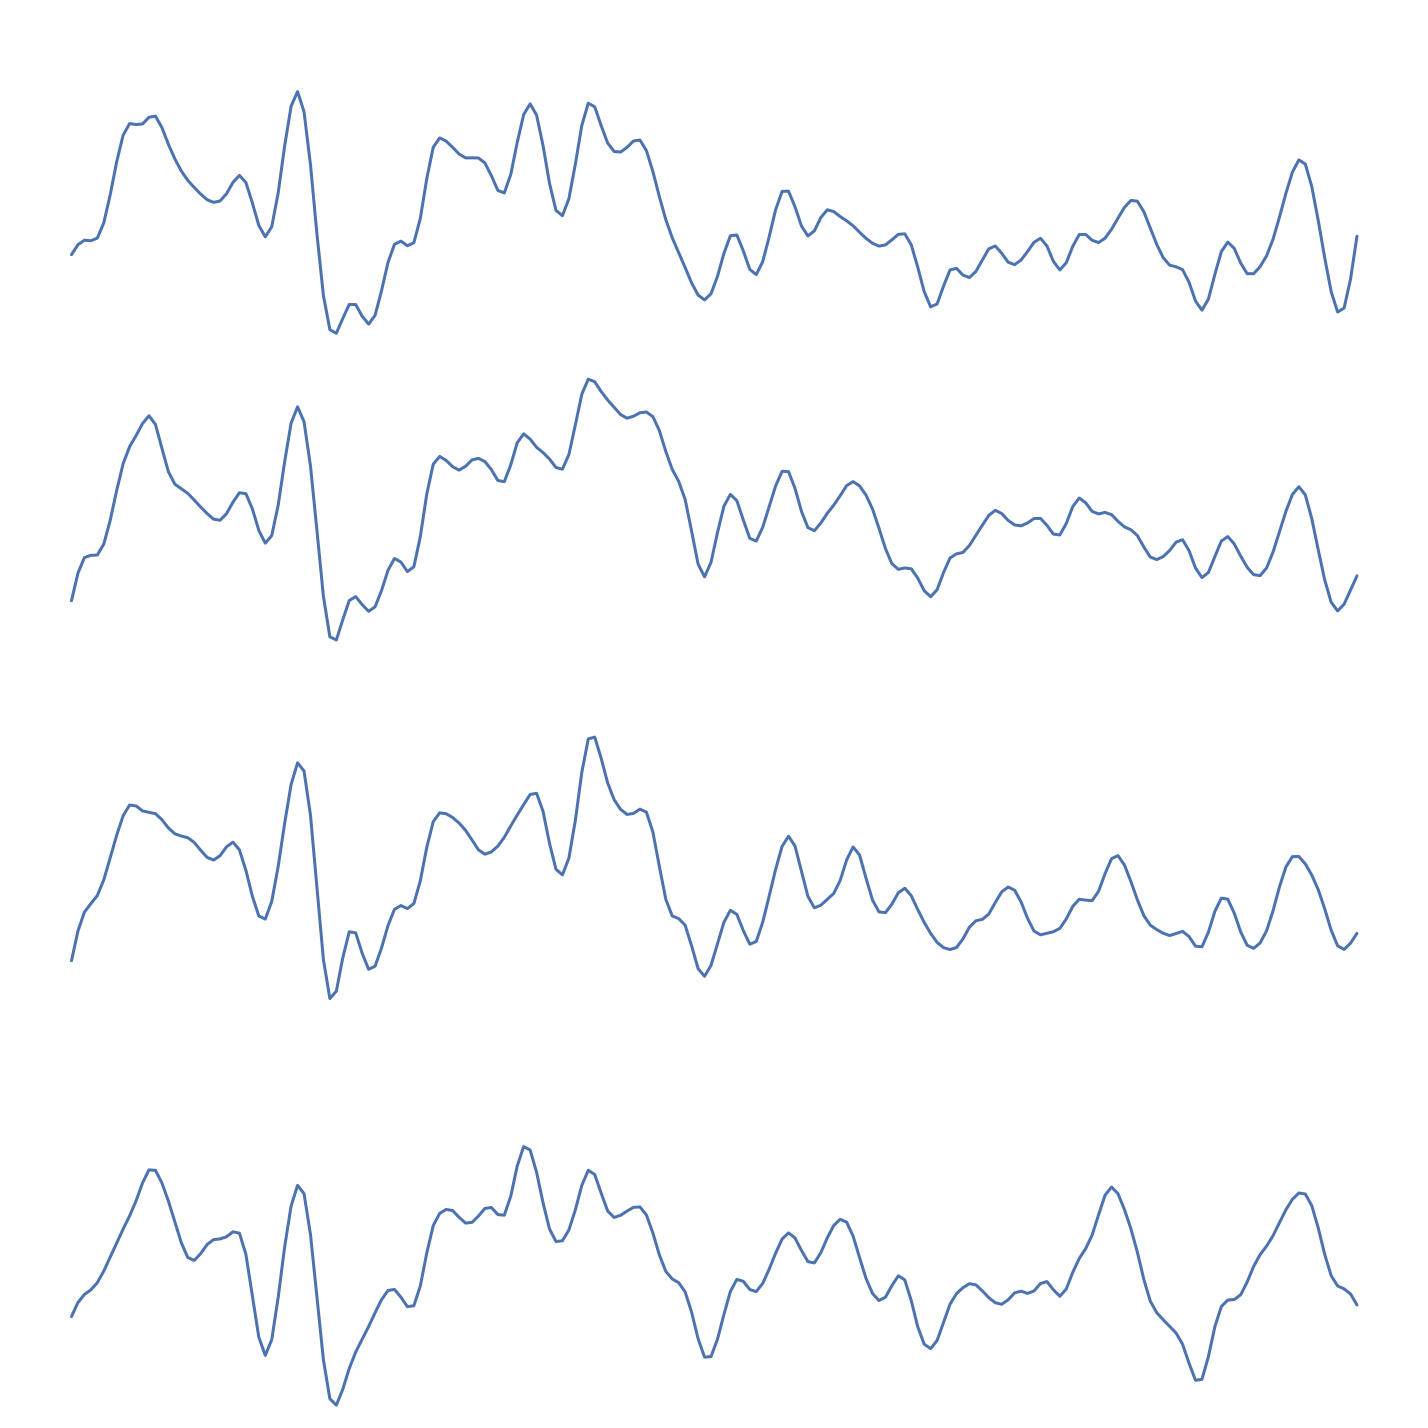

In [100]:
 line_kws = dict(
    data=test.reset_index(), 
    x='time', 
    y='uV',
    row='channel',
    kind='line',
    aspect=4,
     
     
#         hue= 'event', 
#         style='channel',
#         ci=ci,
#         estimator='mean',
#         palette=sns.color_palette('deep', plot_df.event.nunique())
    )
sns.set(rc={"lines.linewidth":3})
sns.set_style("whitegrid", {'axes.grid' : False})
g = sns.relplot(**line_kws)
# fig.set(xticklabels=[])
sns.despine(bottom=True, top=True, left=True, right=True, trim=True) 
g.set(xlabel=None)
g.set(ylabel=None)
g.set(title=None)
g.set(xticklabels=[])
g.set(yticklabels=[])
g.fig.subplots_adjust(wspace=0, hspace=0)
g.fig.tight_layout()

In [11]:
filter_kws = dict(
    raw=dict(high_pass=None, low_pass=None),
    delta=dict(high_pass=None, low_pass=4),
    theta=dict(high_pass=4, low_pass=8),
    aplha=dict(high_pass=8, low_pass=13),
    beta=dict(high_pass=13, low_pass=30),
    gamma=dict(high_pass=30, low_pass=None),
)


bands = []
for key, value in filter_kws.items():

    kwargs = dict(
        grps_df=grps.get_series(['dbci', ['OAOut'], [1], [1]]),
        channel=['Cz'],
        window=(200*30, 200*31),
        mne_filter_kws=value
        )
    test = get_raw_df(**kwargs)
    test = test.reset_index()
    test['band'] = key
    bands.append(test)
bands = pd.concat(bands)
bands

,group,dataset,subject,trial,time,event,channel,uV,band
0,dbci,OAOut,1,1,0.000,0.0,Cz,-8.109423,raw
1,dbci,OAOut,1,1,0.005,0.0,Cz,-1.170508,raw
2,dbci,OAOut,1,1,0.010,0.0,Cz,-7.411594,raw
3,dbci,OAOut,1,1,0.015,0.0,Cz,-6.282682,raw
4,dbci,OAOut,1,1,0.020,0.0,Cz,-1.583771,raw
...,...,...,...,...,...,...,...,...,...
195,dbci,OAOut,1,1,0.975,0.0,Cz,-1.716980,gamma
196,dbci,OAOut,1,1,0.980,0.0,Cz,-2.370147,gamma
197,dbci,OAOut,1,1,0.985,0.0,Cz,1.818290,gamma
198,dbci,OAOut,1,1,0.990,0.0,Cz,2.572573,gamma


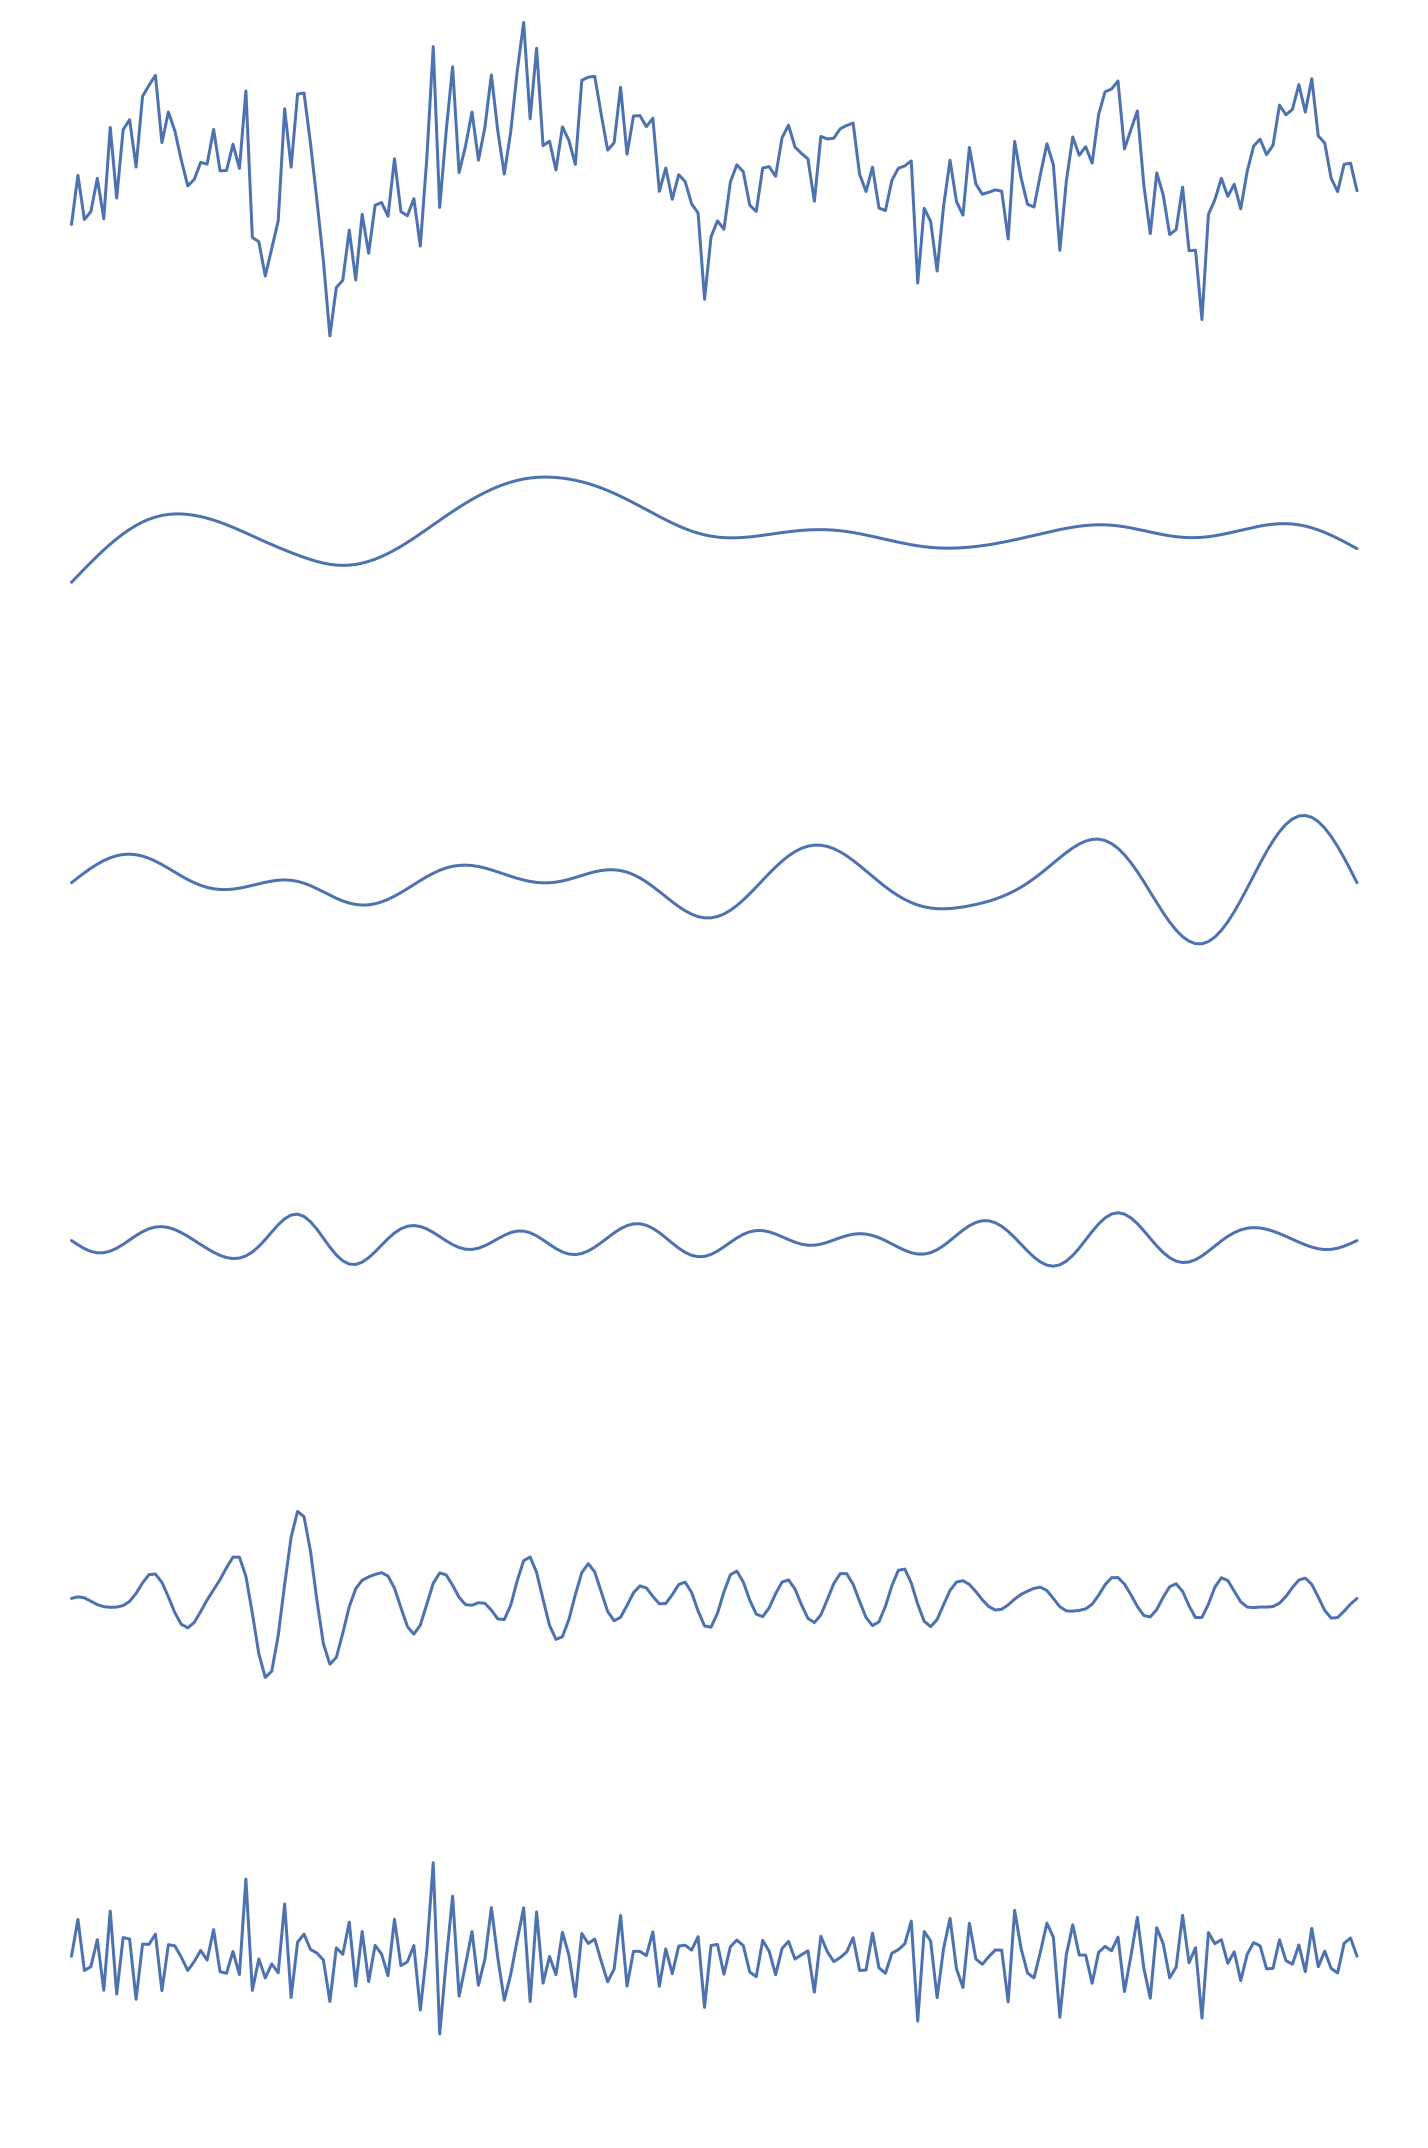

In [12]:
 line_kws = dict(
    data=bands, 
    x='time', 
    y='uV',
    row='band',
    kind='line',
    aspect=4,
)
sns.set(rc={"lines.linewidth":3})
sns.set_style("whitegrid", {'axes.grid' : False})
g = sns.relplot(**line_kws)
sns.despine(bottom=True, top=True, left=True, right=True, trim=True) 
g.set(xlabel=None)
g.set(ylabel=None)
g.set(title=None)
g.set(xticklabels=[])
g.set(yticklabels=[])
g.fig.subplots_adjust(wspace=0, hspace=0)
g.fig.tight_layout()

# plt.savefig('bands.png')
sns.reset_defaults()

In [135]:
window = (200*30, 200*31) # Data between given time points to look at
tmin, tmax = raw.data.times[window[0]], raw.data.times[window[1]]
solo_raw = raw.data.copy().crop(tmin=tmin, tmax=tmax, include_tmax=False)
solo_raw

<RawArray | 5 x 200 (1.0 s), ~23 kB, data loaded>

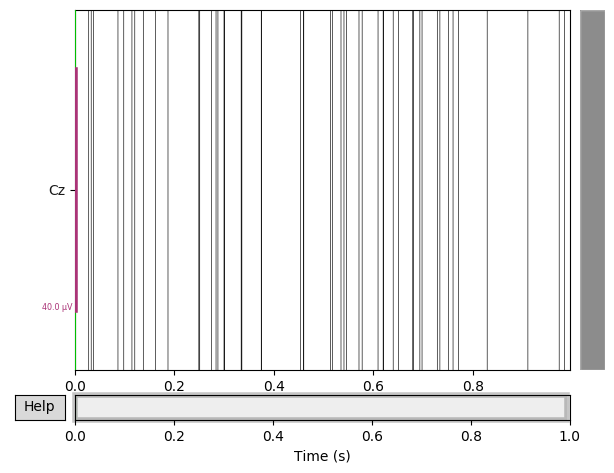

In [136]:
raw_plot = solo_raw.pick_channels(['Cz']).plot();

<ipython-input-137-f66f5a0221d4>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd = solo_raw.plot_psd( picks=['Cz']);


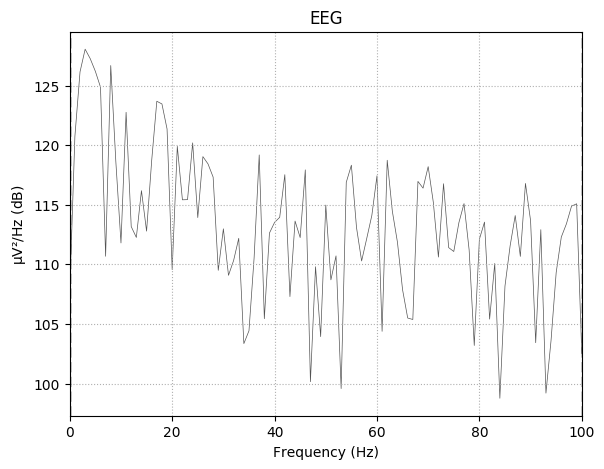

matplotlib.figure.Figure

In [137]:
psd = solo_raw.plot_psd( picks=['Cz']);
type(psd)

### Example: Time vs PSD features 

In [50]:
# Decompose figure.Figure object in order to extract PSD data
psd_bins, psd_data  = psd.get_children()[1].get_children()[2].get_data()

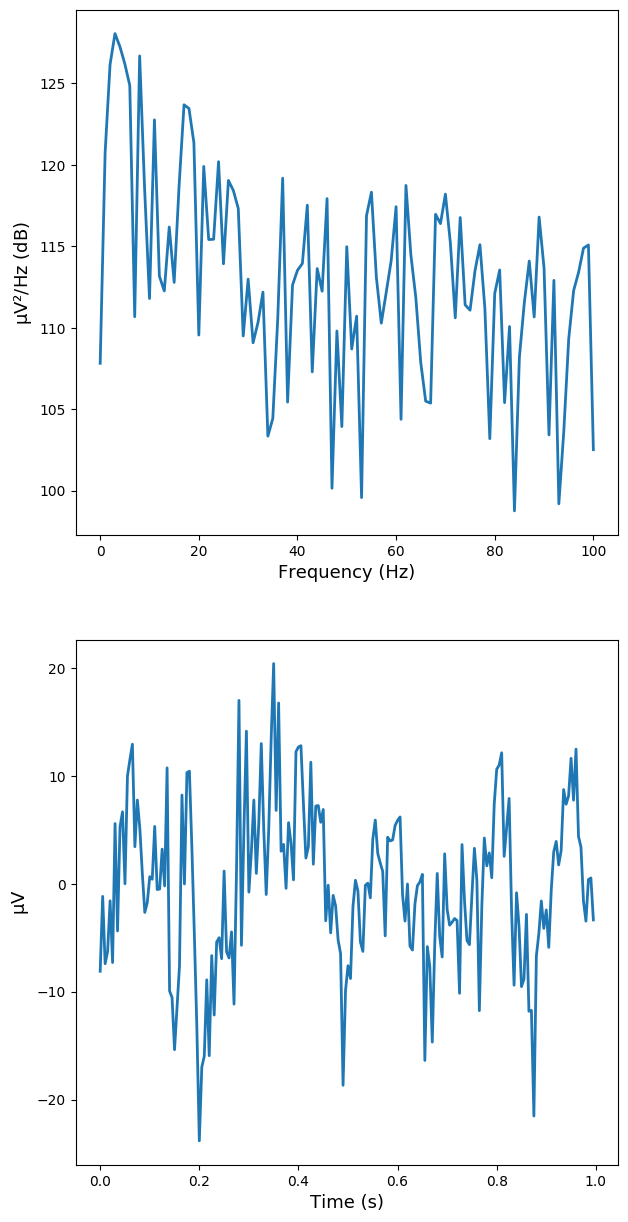

In [145]:
fig, axes = plt.subplots(2,1, figsize=(7,15))
solo_data, solo_time = solo_raw.pick(['Cz'])[:]

axes[0].plot(psd_bins, psd_data, linewidth=2)
axes[0].set_xlabel('Frequency (Hz)', size=13)
axes[0].set_ylabel('$\\mathrm{µV²/Hz}$$\\ \\mathrm{(dB)}$', size=13)
axes[1].plot(solo_time, solo_data.reshape(-1,), linewidth=2)
axes[1].set_xlabel('Time (s)', size=13)
axes[1].set_ylabel('$\\mathrm{µV}$', size=13)

extent = axes[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('psd.png', bbox_inches=extent.expanded(1.3, 1.2))

extent = axes[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('time.png', bbox_inches=extent.expanded(1.3, 1.2))

In [99]:
def average(data, use_events):
    # events_dict = mne_ext.get_epoch_events(data.data, use_events=use_events)
    evoked = {}
    for e in use_events:
        e_idx = np.where(data.data.events[:, -1]==e)[0]
        evoked[e] = data.data[e_idx].average()
    return evoked

evoked = average(bgs_obs_sub1, use_events=ds_events)

iir_params = dict(order=2, ftype='butter', output='ba')
for s, avg in evoked.items():
    avg.filter(l_freq=None, h_freq=30, method='iir', iir_params=iir_params)

NameError: name 'bgs_obs_sub1' is not defined

Need more than one channel to make topography for eeg. Disabling interactivity.


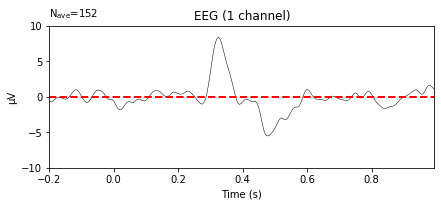

In [72]:
plot_kws = dict(
    hline=[0], 
    show=False, 
    scalings=dict(eeg=1),
    ylim=dict(eeg=[-10,10]),
)
evoked[1].plot(picks=['Cz'], **plot_kws);

<ipython-input-71-49dca13f9872>:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(dict(ern=evoked[1], crn=evoked[2]), picks=['Cz'], show=False);


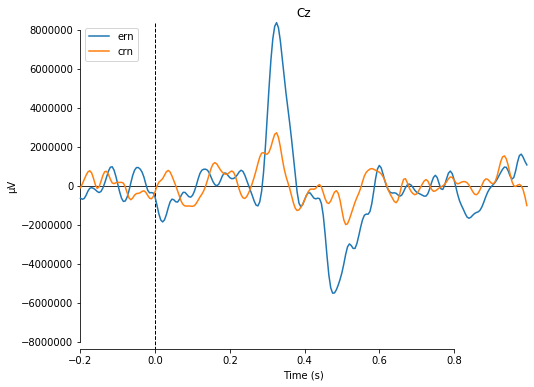

In [71]:
fig = plt.figure()
channels = 4
signals = 2
mne.viz.plot_compare_evokeds(dict(ern=evoked[1], crn=evoked[2]), picks=['Cz'], show=False);

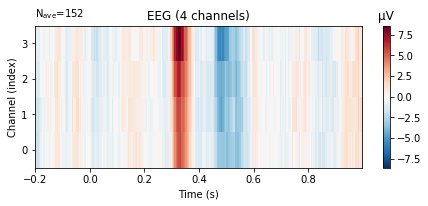

In [54]:
evoked[1].plot_image(picks=['eeg'],  scalings=dict(eeg=1),);

No baseline correction applied


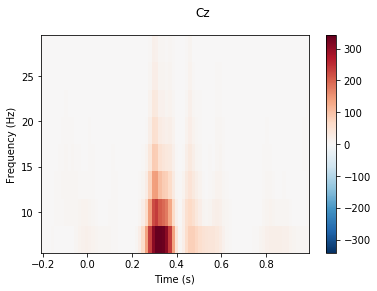

In [98]:
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(evoked[1], n_cycles=2, return_itc=False,
                                      freqs=frequencies, decim=3)
power.plot(['Cz']);

In [102]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

x = [('test', evoked[1]), ('test2', evoked[2])]

def f(evoked):
    evoked.channels
    evoked.plot(**plot_kws);

interact(f, evoked=x);

interactive(children=(Dropdown(description='evoked', options=(('test', <Evoked  |  '1' (average, N=152), [-0.2…

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
import numpy as np

out1 = widgets.Output()
out2 = widgets.Output()
data1 = pd.DataFrame(np.random.normal(size = 50))
data2 = pd.DataFrame(np.random.normal(size = 100))

tab = widgets.Tab(children = [out1, out2])
tab.set_title(0, 'First')
tab.set_title(1, 'Second')
display(tab)

with out1:
    fig1, axes1 = plt.subplots()
    data1.hist(ax = axes1)
    plt.show(fig1)

with out2:
    fig2, axes2 = plt.subplots()
    data2.hist(ax = axes2)
    plt.show(fig2)

In [67]:
from ipywidgets import IntSlider, Output, VBox
signalslider = IntSlider(description="Signal",max=len(signals)-1)
channelslider = IntSlider(description="Channel",max=0)
out = Output()

def update_channels(change):
    signal = signals[change.new]
    channelslider.max = signal.shape[0]-1
signalslider.observe(update_channels, 'value')

def update_plot(change):
    output.clear_output(wait=True)
    with output:
        signal = signals[signalslider.value]
        plt.plot(signal[channelslider.value])
        plt.show()
signalslider.observe(update_plot, 'value')
channelslider.observe(update_plot, 'value')

update_plot(change=None)
# out = widgets.interactive_output(update_plot, [signalslider, channelslider])
VBox([signalslider, channelslider, out])

In [22]:


caption = widgets.Label(value='The values of range1 and range2 are synchronized')
slider = widgets.IntSlider(min=-5, max=5, value=1, description='Slider')

def handle_slider_change(change):
    caption.value = 'The slider value is ' + (
        'negative' if change.new < 0 else 'nonnegative'
    )

slider.observe(handle_slider_change, names='value')

display(caption, slider)



Label(value='The values of range1 and range2 are synchronized')

IntSlider(value=1, description='Slider', max=5, min=-5)

# Preformance Check

In [42]:
import numpy as np
import timeit

size = 10000000
index = np.arange(size)
np.random.shuffle(index)
index = index[:int(size-size/2)]
a = np.ones((size,))
l = [1] * size
index.shape

(5000000,)

In [51]:
start_time = timeit.default_timer()
list_ = [l[i] for i in index]
lapsed_list = timeit.default_timer() - start_time
lapsed_list

1.382441394001944

In [47]:
start_time = timeit.default_timer()
array = a[index]
lapsed_array_idx = timeit.default_timer() - start_time
lapsed_array_idx

0.04550039899913827

In [48]:
start_time = timeit.default_timer()
new_array =  np.zeros(len(list_))
for j, i in enumerate(list_):
    new_array[j] = i
lapsed_array_init = timeit.default_timer() - start_time
lapsed_array_init

1.132949403996463

In [49]:
lapsed_array_init + lapsed_array_idx

1.1784498029956012

In [52]:
lapsed_list - (lapsed_array_init + lapsed_array_idx)

0.2039915910063428